In [1]:
#! jupyter nbconvert --to html dataset-preprocess.ipynb

In [2]:
""" 
dependencies:
  - python=3.8.17
  - numpy=1.24.0
  - matplotlib=3.7.1
  - pandas=2.0.2 
"""

' \ndependencies:\n  - python=3.8.17\n  - numpy=1.24.0\n  - matplotlib=3.7.1\n  - pandas=2.0.2 \n'

In [3]:
import os
import random
import datetime
from itertools import product 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import random
# random.seed(42)
# np.random.seed(42)
# np.random.RandomState(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1' 

In [4]:
finish_sound = "afplay /Users/mehmet/Documents/vs-code/winsquare.mp3"
# play sound when finished
# os.system(finish_sound)

In [5]:
classes = ['Non_Demented','Very_Mild_Demented','Mild_Demented','Moderate_Demented']
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
datafile = ['','','','']
dataframe = pd.DataFrame()
for i in range(len(classes)):
    datafile[i] = sorted(os.listdir(folder_path + classes[i]))
    filenames = pd.DataFrame(datafile[i], columns=['filename'])
    class_labels = pd.DataFrame(np.full((len(datafile[i]),1), classes[i]), columns=['class_label'])
    dataframe = pd.concat([dataframe, pd.concat([filenames, class_labels], axis=1)], axis=0)
dataframe = dataframe.reset_index(drop=True)
dataframe['class_label'] = dataframe['class_label'].str[:]
classes = dataframe['class_label'].unique()
dataframe

,filename,class_label
0,non.jpg,Non_Demented
1,non_10.jpg,Non_Demented
2,non_100.jpg,Non_Demented
3,non_1000.jpg,Non_Demented
4,non_1001.jpg,Non_Demented
...,...,...
6395,moderate_63.jpg,Moderate_Demented
6396,moderate_64.jpg,Moderate_Demented
6397,moderate_7.jpg,Moderate_Demented
6398,moderate_8.jpg,Moderate_Demented


In [6]:
class_counts = []
for i in datafile:
    class_counts.append(len(i)) 
    print('There are',len(i),'images belonging to',classes[datafile.index(i)], 'class')
print('Total number of images:', sum(class_counts))

There are 3200 images belonging to Non_Demented class
There are 2240 images belonging to Very_Mild_Demented class
There are 896 images belonging to Mild_Demented class
There are 64 images belonging to Moderate_Demented class
Total number of images: 6400


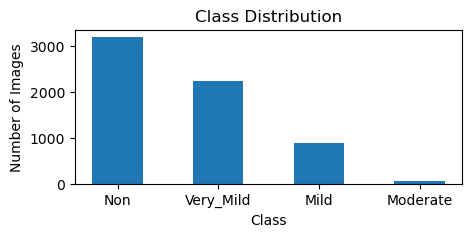

In [7]:
# Plot class distribution

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
bins = np.linspace(0 - .25, 3 + .25, 8)
ax.hist(dataframe['class_label'].str[:-9].values,bins=bins)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
plt.show()

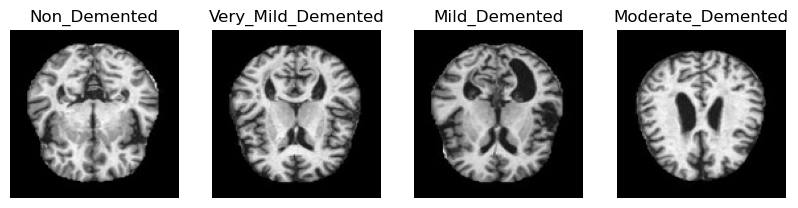

In [8]:
# Display 1 random images from each class

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(10, 5)
for i in range(len(classes)):
    for j in range(1):
        # get random image dataframe
        start = dataframe[dataframe['class_label']==classes[i]].first_valid_index()
        end = dataframe[dataframe['class_label']==classes[i]].last_valid_index() 
        sample = np.random.randint(start, end)-start
        dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        random_image = dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        filename = folder_path + classes[i] + '/' + random_image
        ax[i].imshow(plt.imread(filename), cmap='gray')
        ax[i].set_title(classes[i])
        ax[i].axis('off')
plt.show()

In [9]:
# Convert all images to numpy array and flatten them

folderpath ='/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
image_data = []
for instance in dataframe['filename']:
    # find class label
    folder_name = dataframe[dataframe['filename']==instance]['class_label'].values[0] + '/'
    image2 = plt.imread(folderpath+folder_name+instance)
    image2_flatten = image2.flatten().T
    image_data.append(image2_flatten)
image_arr = np.array(image_data)
output_labels = np.array(dataframe['class_label'].values)
image_arr.shape, output_labels.shape

((6400, 16384), (6400,))

In [10]:
# Create dataframe from image array

image_df = pd.DataFrame(image_arr)
# Rescale pixel values
#image_df = image_df/255
image_df.columns = image_df.columns.astype(str)
image_df['filename'] = dataframe['filename']
image_df['class_label'] = output_labels
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16376,16377,16378,16379,16380,16381,16382,16383,filename,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non.jpg,Non_Demented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_10.jpg,Non_Demented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_100.jpg,Non_Demented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1000.jpg,Non_Demented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1001.jpg,Non_Demented


In [11]:
def train_test_split(dataframe, test_size, validation_size=0, random_state=42):
    # Function to split pandas dataframe into train, test and validation sets
    """ Split data into train and test sets.
    Args:
        dataframe (pandas dataframe): Input Pandas Dataframe
        test_size (float): float between 0 and 1
        validation_size (float): float between 0 and 1
        random_state (int): random seed
    """
    class_labels = dataframe['class_label'].unique()
    dataframe = dataframe.sample(frac=1, random_state=random_state).reset_index(drop=True)
    train_size = 1 - test_size - validation_size
    # train 
    train_df = pd.DataFrame()
    for i in range(len(classes)):
        train_df = pd.concat([train_df, dataframe[dataframe['class_label']==classes[i]].iloc[:round(class_counts[i]*train_size),:]], axis=0)
    train_df = train_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # test
    test_df = pd.DataFrame()
    for i in range(len(classes)):
        test_df = pd.concat([test_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*(train_size+validation_size)):,:]], axis=0)
    test_df = test_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    if validation_size > 0:
        # validation
        val_df = pd.DataFrame()
        for i in range(len(classes)):
            val_df = pd.concat([val_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*train_size):round(class_counts[i]*(1-validation_size)),:]], axis=0)
        val_df = val_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
        
        return train_df, val_df, test_df
    return train_df, test_df

In [12]:
def delete_zero_columns(dataframe):
    # X: dataframe
    k = dataframe['filename']
    y = dataframe['class_label']
    X = dataframe.drop(['filename','class_label'], axis=1).values
    mean_ = np.mean(X, axis=0)
    scale_ = np.std(X - mean_, axis=0)
    if np.any(scale_ == 0):
        mask = np.where(scale_ == 0)
    X_new = np.delete(X, mask, axis=1)
    out_df = pd.concat([pd.DataFrame(X_new), k, y], axis=1)
    return out_df

In [13]:
image_df_clean = delete_zero_columns(image_df)

train_df, val_df, test_df = train_test_split(image_df_clean, test_size=0.1, validation_size=0.1, random_state=42)

train_df.shape,val_df.shape, test_df.shape

((5120, 10861), (640, 10861), (640, 10861))

In [14]:
class StandardScaler():
    # StandardScaler Class written from scratch similar to sklearn.preprocessing.StandardScaler
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        if np.any(self.scale_ == 0):
            self.scale_ = np.where(self.scale_ == 0, 1, self.scale_)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [15]:
class OneHotEncoder():
    def __init__(self):
        pass
    
    def fit(self, classes_encode=None, y=None):
        """ Which class is encoded as which number
        Args:
            classes_encode (dict): Dictionary of classes and their encoded values
        """
        if classes_encode is None:
            self.classes_encode = {class_:i for i, class_ in enumerate(np.unique(y))}
        if y is None:
            self.classes_encode = classes_encode
        return self
        
    def transform(self, y):
        """ One hot encoder
        Args:
            y (pandas dataframe): Output labels
        """

        for i in y:
            y = y.replace(i, self.classes_encode[i])
        # One-hot encoding
        y_onehot = np.zeros((len(y.values), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
            
        return y_onehot

In [16]:
X_train = train_df.drop(['filename','class_label'], axis=1).values
y_train = train_df['class_label']
X_val = val_df.drop(['filename','class_label'], axis=1).values
y_val = val_df['class_label']
X_test = test_df.drop(['filename','class_label'], axis=1).values
y_test = test_df['class_label']

# Scale data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode Labels with given dictionary
classes_encode = {'Non_Demented':0, 'Very_Mild_Demented':1, 'Mild_Demented':2, 'Moderate_Demented':3}
encoder = OneHotEncoder()
encoder.fit(classes_encode)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)
    
print(X_train.shape, y_train.shape,'\n', X_val.shape, y_val.shape,'\n', X_test.shape, y_test.shape)

(5120, 10859) (5120, 4) 
 (640, 10859) (640, 4) 
 (640, 10859) (640, 4)


In [25]:
class LogisticRegression():
    # Logistic Regression Model written from scratch without Bias w0
    def __init__(self):
        self.W = None
        self.now = None
        self.print_result = True
        self.history = None
        self.validation_accuracy = None
        
    def validation_accuracy(self):
        return self.validation_accuracy
    
    def history(self):
        return self.history
    
    def load_history(self):
        pd_hist = pd.read_csv(f'model-comparison/{self.now}/history.csv')
        self.history = np.array(pd_hist.iloc[:,1:])
        
    def plot(self, save = True):
        # Save history as csv file
        history_local = self.history
        if type(history_local) is not pd.DataFrame:
            history_df = pd.DataFrame(history_local)
        if save == True:
            hist_csv_file = f'model-comparison/{self.now}/history.csv'
            with open(hist_csv_file, mode='w') as f:
                history_df.to_csv(f) 
        # Plot Loss and Accuracy History as Subplots
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(10, 2)
        index = np.arange(1,self.history.shape[1]+1)*10

        ax[0].plot(index, self.history[0], label='Training Loss')
        ax[0].plot(index, self.history[2], label='Validation Loss')
        ax[0].set_title('Loss History')
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Loss')
        ax[0].legend()

        ax[1].plot(index, self.history[1], label='Training Accuracy')
        ax[1].plot(index, self.history[3], label='Validation Accuracy')
        ax[1].set_title('Accuracy History')
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()
        if save is True and self.now is not None:
            plt.savefig(f'model-comparison/{self.now}/plot.png')
        if self.print_result == True:
            plt.show()
        else:
            plt.close(fig)
        
    
    def validation(self, X, y, W, lmbda):
        # Find loss and accuracy on validation set
        y_onehot = y # y is already one-hot encoded
        Z = - X @ W
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(W**2)
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == np.argmax(y, axis=1))
        return loss, accuracy
    
    def fit(self, X, y, X_val, y_val, now = None, print_result = True,max_iter=400, lr=0.01, lr_type = 'static', regularization='l2: 0.01'):
        start_time = datetime.datetime.now()
        # if there isn't model-comparison folder, create it
        if not os.path.exists('model-comparison'):
            os.mkdir('model-comparison')
        self.print_result = print_result
        if now is not None:
            self.now = now
        # Create folder for current model
            os.mkdir('model-comparison/'+now)
        
        self.history = np.zeros((4,max_iter//10))
        y_onehot = y # y is already one-hot encoded
        lr_print = str(lr) + ' ' + lr_type
        model_specs = 'Logistic Regression | lr: {} | regularization: {} | Max Iteration: {} |'.format(lr_print, regularization, max_iter)
        
        # Initialize weights ( shape = features x classes matrix )
        self.W = np.zeros((X.shape[1], y_onehot.shape[1])) 
        
        # Print loss and accuracy every 100 iterations or every max_iter//10 iterations if max_iter >= 1000
        print_step = 100
        if max_iter >= 1000:
            print_step = max_iter // 10
            
        # Gradient Descent
        for iteration in range(1, max_iter+1):
            Z = - X @ self.W
            # Logistic function to find probabilities
            P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
            # Number of X instances
            N = X.shape[0]
            # Derivative of Residual ( log-loss )
            dRSS = 2/N * (X.T @ (y_onehot - P))
            # Choose regularization
            if regularization[0:2] == 'l2':
                # L2 regularization
                lmbda = float(regularization[4:])
                dRegTerm = 2 * lmbda * self.W
            elif regularization[0:2] == 'l1':
                # L1 regularization
                lmbda = float(regularization[4:])
                dRegTerm = lmbda * np.sign(self.W) 
            else:
                # No regularization
                lmbda = 0
                dRegTerm = 0
            # Calculate gradient
            gradient = dRSS + dRegTerm
            
            if lr_type[0:8] == 'momentum':
                if iteration == 1:
                    last_gradient = gradient
                else:
                    momentum = float(lr_type[10:])
                    gradient = gradient + momentum * last_gradient
                    last_gradient = gradient
                
            # Update weights
            self.W = self.W - lr * gradient
            
            # Change learning rate if lr_type is adaptive
            if lr_type == 'adaptive':
                if iteration % 300 == 0:                    
                    lr = lr * 2
                    if print_result == True:
                        print('Learning rate changed to', lr)
            
            # Calculate loss and accuracy every 10 iterations:
            if iteration % 10 == 0:
                loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(self.W**2)
                accuracy = np.mean(self.predict(X) == np.argmax(y, axis=1))
                val_loss = self.validation(X_val, y_val, self.W, lmbda)[0]
                val_acc = self.validation(X_val, y_val, self.W, lmbda)[1]
                self.validation_accuracy = val_acc
                self.history[:,(iteration//10)-1] = np.array([loss, accuracy, val_loss, val_acc])
                
                # Print loss and accuracy every 100 iterations
                if iteration % print_step == 0:
                    line1 = 'Iteration: ' + str(iteration)
                    line2 = ' | Loss: ' + str(round(loss)) + ' | Accuracy: ' + str(accuracy)[0:5]
                    line3 = ' | Val. Loss: ' + str(round(val_loss)) + ' | Val. Acc: ' + str(val_acc)[0:5]
                    if print_result == True:
                        print(line1 + line2 + line3)
                    if now is not None:
                        with open('model-comparison/{}/log.txt'.format(now), 'a') as f:
                            f.write(line1 + line2 + line3 + '\n')
            if iteration == max_iter:
                end_time = datetime.datetime.now()
                if print_result == True:
                    print('Training finished. Time elapsed:', end_time - start_time)
                val_acc_print = str(val_acc*100)+ '00'
                if now is not None:
                    with open('model-comparison/{}/log.txt'.format(now), 'a') as f:
                        write_line = 'Training finished. Time elapsed: ' + str(end_time - start_time) + '\n'
                        f.write(write_line)
                    with open('model-comparison/{}/{}-val-acc.txt'.format(now,val_acc_print[0:5]), 'w') as f:
                        f.write(model_specs)
                    with open('model-comparison/last.txt', 'w') as f:
                        f.write(str(now))
                
    def predict(self, X):
        Z = - X @ self.W
        # Logistic function to find probabilities
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        # Predict class
        y = np.argmax(P, axis=1)
        return y
    def save_weights(self):
        filename = 'model-comparison/{}/weights.npy'.format(self.now)
        np.save(filename, self.W)
    def load_weights(self, now):
        filename = 'model-comparison/{}/weights.npy'.format(now)
        self.W = np.load(filename)
        self.now = now

In [26]:
class EvaluateModel():
    # Class to evaluate model performance, similar to sklearn.metrics ClassificationReport and ConfusionMatrix
    def __init__(self, y_true, y_pred, str1, now, save=True, print_result=True):
        self.y_true = np.argmax(y_true, axis=1)
        self.y_pred = y_pred
        if save == True:
            os.mkdir('model-comparison/'+now+'/'+str1)
            np.savetxt('model-comparison/{}/{}/pred.csv'.format(now,str1), y_pred, delimiter=',', fmt='%d')
        
        result = self.classification_report()
        fpr0 = 100 - float(result['precision'][0][0:4])
        line1 = 'Accuracy is: ' + str(result['f1-score']['accuracy'])
        line2 = 'F1 Score is: ' + str(result['f1-score']['weighted avg'])
        line3 = 'Precision of Class 0 is: ' + '{0:.2f}'.format(100-fpr0)+ ' %'
        line4 = '\nClassification Report:'
        line5 = '\nConfusion Matrix:'
        cm = self.confusion_matrix()
        line6 = '\n'
        res_total = line1 + '\n' + line2 + '\n' + line3 + '\n' + line4 + '\n' + str(result) + '\n' + line5 + '\n' + str(cm) + '\n' + line6
        # write to file
        if save == True:
            with open('model-comparison/{}/{}/report.txt'.format(now,str1), 'w') as f:
                f.write(res_total)
        if print_result == True:
            print(res_total)

    def accuracy_score(self, y_t, y_p):
        correct = sum(y_t == y_p)
        return correct / len(y_t)

    def scores(self, y_t, y_p, class_label= 1):
        true = y_t == class_label
        pred = y_p == class_label
        tp = sum(true & pred)
        fp = sum(~true & pred) 
        fn = sum(true & ~pred)
        tn = sum(~true & ~pred) 
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
        return precision, recall, f1
    
    def confusion_matrix(self,labels=None):
        labels = labels if labels else sorted(set(self.y_true) | set(self.y_pred))        
        indexes = {v:i for i, v in enumerate(labels)}
        matrix = np.zeros((len(indexes),len(indexes))).astype(int)
        for t, p in zip(self.y_true, self.y_pred):
            matrix[indexes[t], indexes[p]] += 1
        # print('Confusion Matrix: ')
        # print(pd.DataFrame(matrix, index=labels, columns=labels))
        return pd.DataFrame(matrix, index=labels, columns=labels)

    def classification_report(self):
        output_dict = {}
        support_list = []
        precision_list = []
        recall_list = []
        f1_list = []
        for i in np.unique(self.y_true):
            support = sum(self.y_true == i)
            precision, recall, f1 = self.scores(self.y_true, self.y_pred, class_label=i)
            output_dict[i] = {'precision':precision, 'recall':recall, 'f1-score':f1, 'support':support}
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
            support_list.append(support)
        support = np.sum(support_list)
        output_dict['accuracy'] = {'precision':0, 'recall':0, 'f1-score':self.accuracy_score(self.y_true, self.y_pred), 'support':support}
        # macro avg
        macro_precision = np.mean(precision_list)
        macro_recall = np.mean(recall_list)
        macro_f1 = np.mean(f1_list)
        output_dict['macro avg'] = {'precision':macro_precision, 'recall':macro_recall, 'f1-score':macro_f1, 'support':support}
        # weighted avg
        weighted_precision = np.average(precision_list, weights=support_list)
        weighted_recall = np.average(recall_list, weights=support_list)
        weighted_f1 = np.average(f1_list, weights=support_list)
        output_dict['weighted avg'] = {'precision':weighted_precision, 'recall':weighted_recall, 'f1-score':weighted_f1, 'support':support}
        # convert to dataframe and format
        report_d = pd.DataFrame(output_dict).T
        annot = report_d.copy()
        annot.iloc[:, 0:3] = (annot.iloc[:, 0:3]*100).applymap('{:.2f}'.format) + ' %'
        annot['support'] = annot['support'].astype(int)
        annot.loc['accuracy','precision'] = ''
        annot.loc['accuracy','recall'] = ''
        return annot

In [ ]:
# Train new model
now = datetime.datetime.now().strftime("%d-%m-%H-%M")

# Fit model 
model = LogisticRegression()
model.fit(X_train, y_train, X_val, y_val, now,
          max_iter=1000, lr=0.01, lr_type='momentum: 0.99', regularization='l2: 0.01')
model.save_weights()
model.plot()

# Validation Set Results
y_pred = model.predict(X_val)
results = EvaluateModel(y_val, y_pred, 'val', now)

# Test Set Results
y_pred = model.predict(X_test)
results = EvaluateModel(y_test, y_pred, 'test', now)

# play sound when finished
os.system(finish_sound)

In [ ]:
# Load Trained Model and Evaluate
#now = open('model-comparison/last.txt', 'r').read()
now = 'deneme'
model = LogisticRegression()
model.load_weights(now)
model.load_history()

# Validation Set Results
model.plot(save=False)
y_pred = model.predict(X_val)
results = EvaluateModel(y_val, y_pred, 'val', now, save=False)

# Test Set Results
y_pred = model.predict(X_test)
results = EvaluateModel(y_test, y_pred, 'test', now, save=False)

# **GRID SEARCH**

In [19]:
def GridSearch(model_options, X_train, y_train, X_val, y_val, X_test, y_test):
    # Grid Search Function
    best_metric = 0
    for models in model_options:
        model_number = model_options.index(models) + 1
        now = datetime.datetime.now().strftime("%d-%m-%H-%M")
        model = LogisticRegression()
        model.fit(X_train, y_train, X_val, y_val, now, print_result=False,
                max_iter=models[0], lr=models[1], lr_type=models[2], regularization=models[3])
        metric = model.validation_accuracy
        model.save_weights()
        model.plot()
        y_pred = model.predict(X_val)
        results = EvaluateModel(y_val, y_pred, 'val', now, print_result=False)
        y_pred = model.predict(X_test)
        results = EvaluateModel(y_test, y_pred, 'test', now, print_result=False)
        if metric > best_metric:
            best_metric = metric
            best_model = now
        print('Model ', str(model_number), ' saved with name: ', now)
        print(models, 'Val-Accuracy:', metric)
        # append to txt file
        with open('model-comparison/best-models.txt', 'a') as f:
            f.write(now + ' | ' + str(models) + ' | ' + str(metric) + '\n')
        print(len(model_options)-model_number, 'models left to train.')
    best_metric = str(best_metric*100)[:5]
    print('Best Model is:', best_model, 'with validation accuracy:', best_metric, '%')

In [30]:
# Grid Search Combinations
max_iter = [1000]
lr = [0.01, 0.005, 0.001]
lr_type = ['static', 'adaptive', 'momentum: 0.99']
regularization = ['l2: 0.01', 'l2: 0.001', 'l2: 0.0001', 'l1: 0.01', 'l1: 0.001', 'l1: 0.0001']
params = [max_iter, lr, lr_type, regularization]
model_options = list(product(*params))
print('Number of combinations:', len(model_options))
print('Combination 1:', model_options[0])

Number of combinations: 54
Combination 1: (1000, 0.01, 'static', 'l2: 0.01')


In [28]:
GridSearch(model_options, X_train, y_train, X_val, y_val, X_test, y_test)
os.system(finish_sound)

Model  1  saved with name:  24-11-02-55
(1000, 0.01, 'static', 'l2: 0.01') Val-Accuracy: 0.878125
1 models left to train.
Model  2  saved with name:  24-11-02-57
(1000, 0.01, 'static', 'l2: 0.001') Val-Accuracy: 0.878125
0 models left to train.
Best Model is: 24-11-02-55 with validation accuracy: 87.81 %


0